Размерность датасета: (150, 4)

Первые 5 строк:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Типы признаков и наличие пропусков:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

Пропуски:
0 пропущенн

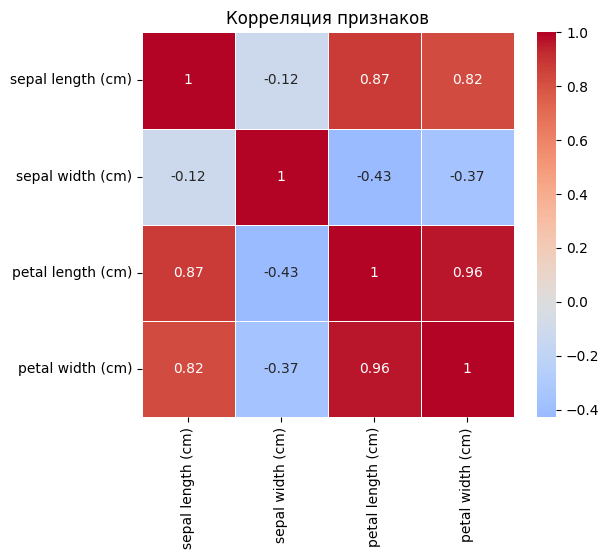

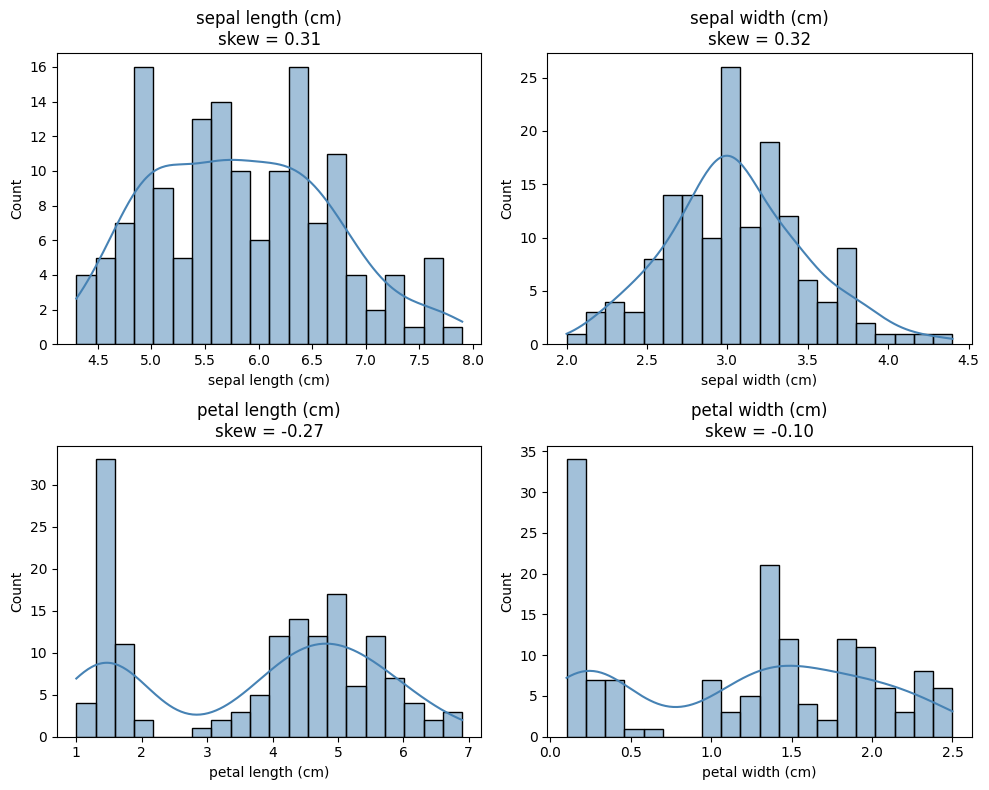

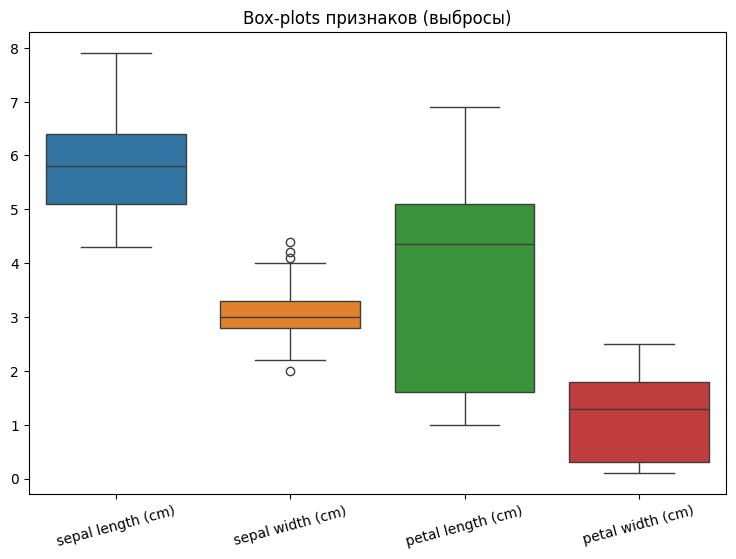

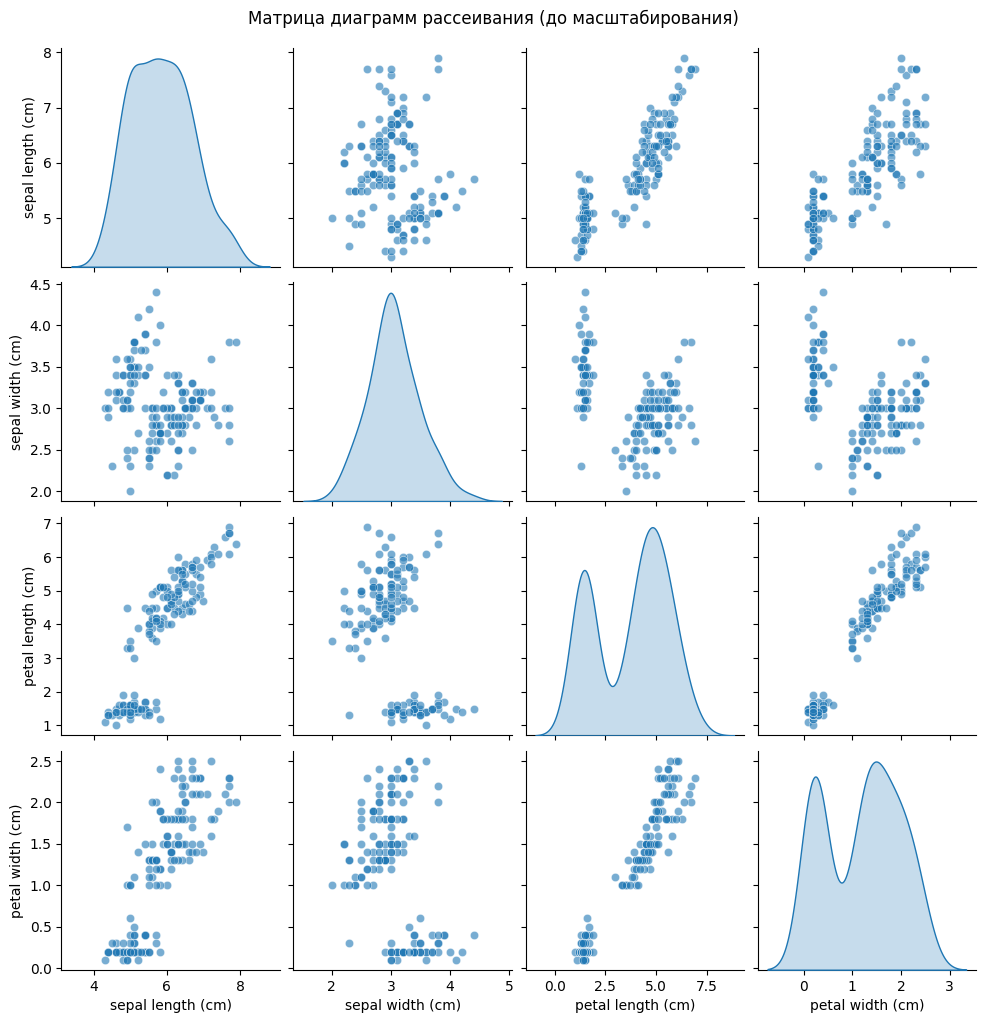

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target

print("Размерность датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())

print("\nТипы признаков и наличие пропусков:")
print(df.info())

print("\nПропуски:")
print(df.isnull().sum().sum(), "пропущенных значений")

print("\nОписательная статистика:")
print(df.describe().round(2))

print("\nКорреляционная матрица:")
print(df.corr().round(3))

plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Корреляция признаков")
plt.show()

plt.figure(figsize=(10, 8))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='steelblue', bins=20)
    plt.title(f'{col}\nskew = {df[col].skew():.2f}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 6))
sns.boxplot(data=df)
plt.title("Box-plots признаков (выбросы)")
plt.xticks(rotation=15)
plt.show()

sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Матрица диаграмм рассеивания (до масштабирования)", y=1.02)
plt.show()

# Анализ датасета Iris

## Общая информация
*   **Объём:** 150 объектов
*   **Признаки:** 4 числовых (float64) — морфология цветка:
    *   Длина чашелистика (sepal length)
    *   Ширина чашелистика (sepal width)
    *   Длина лепестка (petal length)
    *   Ширина лепестка (petal width)
*   **Качество данных:** пропусков нет, данные чистые.

## Наблюдения и выводы

### 1. Масштабирование признаков
Признаки в *сильно разных масштабах* (например, petal width: 0.1–2.5 см; sepal length: 4.3–7.9 см). **Необходимо масштабирование** перед кластеризацией, иначе признаки petal будут доминировать.

### 2. Корреляционная структура
*   **Сильная корреляция (0.96)** между длиной и шириной лепестка (petal).
*   Petal-признаки положительно коррелируют с `sepal length` (0.87, 0.82), но **отрицательно** с `sepal width` (-0.43, -0.37).
*   **Вывод:** основную разделяющую информацию несут признаки **petal**.

### 3. Распределение признаков
*   **Sepal признаки:** близки к нормальному распределению.
*   **Petal признаки:** явная **бимодальность** (два пика):
    *   Пик в области малых значений (вид Setosa).
    *   Пик в области больших значений (виды Versicolor и Virginica).

### 4. Выбросы
Box-plot показал **отсутствие значимых выбросов**. Несколько точек по `sepal width` не критичны.

### 5. Визуальная кластерная структура (pairplot)
Чётко видны **три группы**:
1.  **Setosa:** полностью отделённый компактный кластер (малые значения petal).
2.  **Versicolor & Virginica:** перекрываются по sepal, но **хорошо разделимы** по petal length и особенно по petal width.

## Итоговый вывод
Датасет идеален для демонстрации кластеризации:
*   Чистый, без помех.
*   Имеет ярко выраженную **структуру из трёх кластеров**, соответствующую биологической классификации.
*   **Setosa** линейно отделим от остальных.
*   **Versicolor** и **Virginica** требуют более гибких алгоритмов для точного разделения.

Диапазоны до масштабирования:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
min                4.3               2.0                1.0               0.1
max                7.9               4.4                6.9               2.5

Диапазоны после StandardScaler (mean ≈ 0, std ≈ 1):
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean             -0.000            -0.000             -0.000            -0.000
std               1.003             1.003              1.003             1.003
min              -1.870            -2.434             -1.568            -1.447
max               2.492             3.091              1.786             1.712


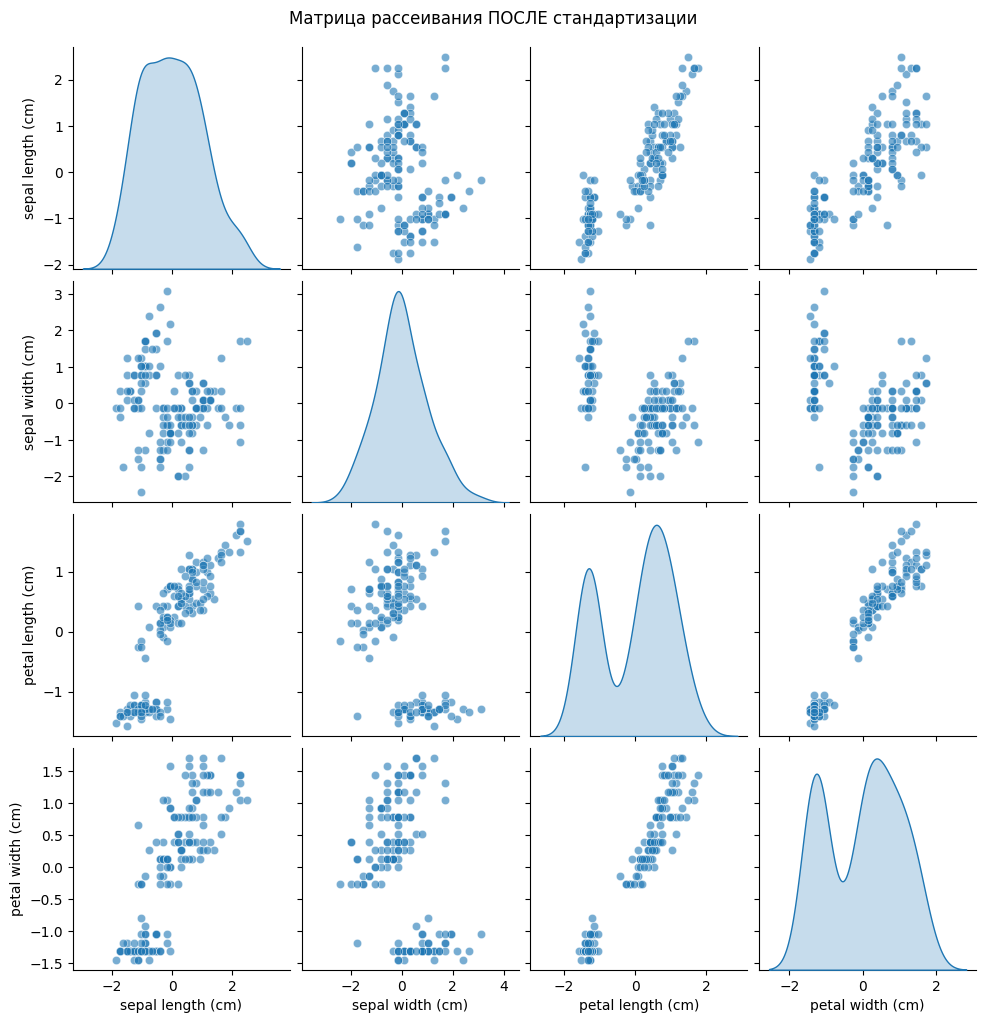

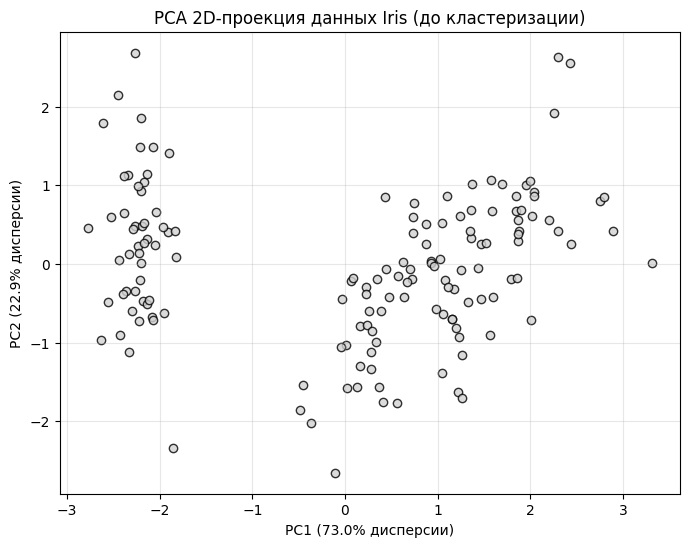

Объяснённая дисперсия двумя компонентами: 95.8%


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Диапазоны до масштабирования:")
print(df.describe().loc[['min', 'max']].round(2))

print("\nДиапазоны после StandardScaler (mean ≈ 0, std ≈ 1):")
print(df_scaled.describe().loc[['mean', 'std', 'min', 'max']].round(3))

sns.pairplot(df_scaled, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Матрица рассеивания ПОСЛЕ стандартизации", y=1.02)
plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='lightgray', edgecolors='black', alpha=0.8)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} дисперсии)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} дисперсии)')
plt.title('PCA 2D-проекция данных Iris (до кластеризации)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Объяснённая дисперсия двумя компонентами: {pca.explained_variance_ratio_.sum():.1%}")


# Результаты стандартизации данных (StandardScaler)

## Эффект масштабирования
*   **Цель:** приведение признаков к нулевому среднему (≈0) и единичной дисперсии (std ≈ 1.003).
*   **Результат:** диапазоны стали симметричны относительно нуля (напр., sepal length: -1.87 до +2.49).
*   **Обоснование:** устранение доминирования признаков с большим разбросом (petal) для алгоритмов, использующих евклидово расстояние (K-means, GMM, DBSCAN).

## Визуальный анализ после масштабирования

### 1. Матрица рассеивания (pairplot)
*   **Оси в одинаковом масштабе** → корректная визуальная оценка расстояний.
*   **Структура стала чётче:**
    *   Кластер **Setosa** полностью изолирован (petal length/width < -1).
    *   Кластеры **Versicolor** и **Virginica** хорошо разделимы по petal length/width (небольшое пересечение).
    *   Признаки sepal стали **соразмерны** по вкладу.

### 2. PCA-проекция (2D)
*   **Чётко видны 3 компактных кластера** (форма близка к сферической, плотность примерно равна).
*   **Объяснённая дисперсия:**
    *   PC1 (горизонталь): **73%** → отделяет Setosa от остальных.
    *   PC2 (вертикаль): **22.9%** → разделяет Versicolor и Virginica.
    *   **Сумма: 95.8%** → данные имеют низкую размерность, признаки информативны.

## Выводы для выбора алгоритма кластеризации

### Оптимальное число кластеров: **3** (подтверждается визуально).

### Рекомендации по алгоритмам:
1.  **K-means:** отличный базовый выбор.
    *   *Плюсы:* кластеры сферические, схожего размера и плотности.
    *   *Минусы:* может не учесть лёгкую эллипсоидальность.

2.  **Gaussian Mixture Model (GMM) с `full` ковариацией:** потенциально более точный.
    *   *Плюсы:* учтёт форму и ориентацию кластеров (особенно для Versicolor/Virginica).

3.  **DBSCAN:** применим, но требует точной настройки параметра `ε`.

4.  **Иерархическая кластеризация:** полезна для проверки структуры через дендрограмму.

### Итог:
Стандартизация сделала кластерную структуру **максимально явной** и подготовила данные для сравнения алгоритмов.

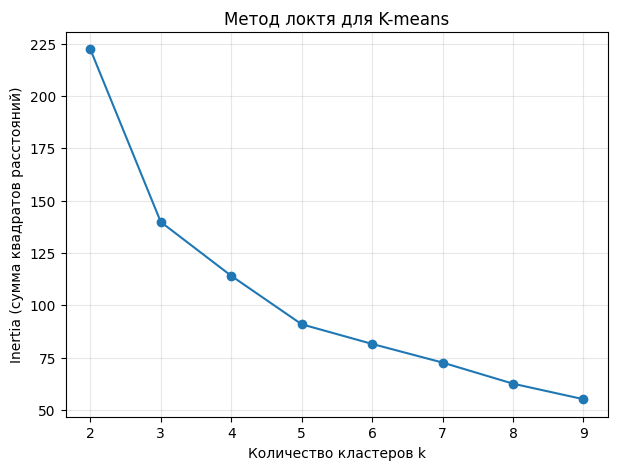

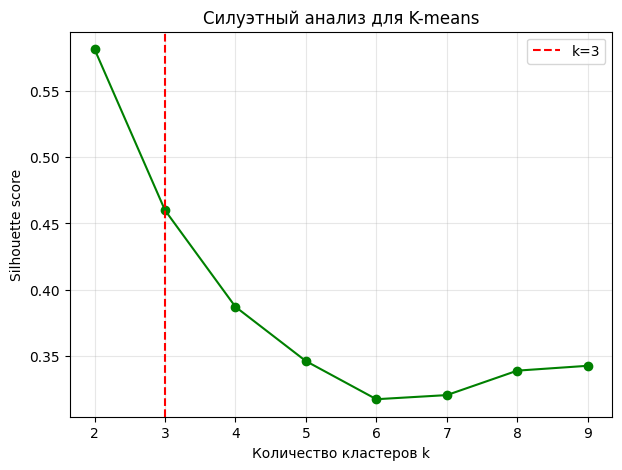

Максимальный silhouette score: 0.5818 при k=2


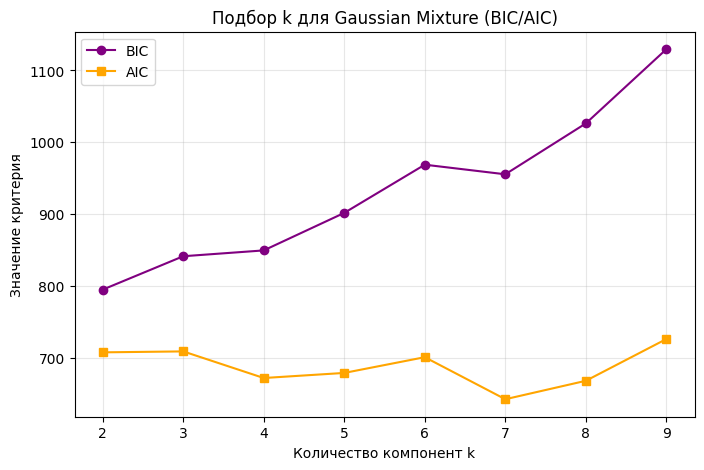

Минимальный BIC при k = 2
Минимальный AIC при k = 7
K-means silhouette score (k=3): 0.4599
K-means inertia: 139.82
GMM silhouette score (k=3): 0.4751
GMM log-likelihood: -2.07


In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

range_k = range(2, 10)

inertias = []
for k in range_k:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(range_k, inertias, marker='o')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia (сумма квадратов расстояний)')
plt.title('Метод локтя для K-means')
plt.grid(True, alpha=0.3)
plt.show()

sil_scores = []
for k in range_k:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(df_scaled)
    sil_scores.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(7, 5))
plt.plot(range_k, sil_scores, marker='o', color='green')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette score')
plt.title('Силуэтный анализ для K-means')
plt.grid(True, alpha=0.3)
plt.axvline(x=3, color='red', linestyle='--', label='k=3')
plt.legend()
plt.show()

print(f"Максимальный silhouette score: {max(sil_scores):.4f} при k={range_k[np.argmax(sil_scores)]}")

bics, aics = [], []
for k in range_k:
    gmm = GaussianMixture(n_components=k, random_state=42, covariance_type='full')
    gmm.fit(df_scaled)
    bics.append(gmm.bic(df_scaled))
    aics.append(gmm.aic(df_scaled))

plt.figure(figsize=(8, 5))
plt.plot(range_k, bics, marker='o', label='BIC', color='purple')
plt.plot(range_k, aics, marker='s', label='AIC', color='orange')
plt.xlabel('Количество компонент k')
plt.ylabel('Значение критерия')
plt.title('Подбор k для Gaussian Mixture (BIC/AIC)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Минимальный BIC при k = {range_k[np.argmin(bics)]}")
print(f"Минимальный AIC при k = {range_k[np.argmin(aics)]}")

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(df_scaled)
centers_kmeans = kmeans.cluster_centers_

print(f"K-means silhouette score (k=3): {silhouette_score(df_scaled, labels_kmeans):.4f}")
print(f"K-means inertia: {kmeans.inertia_:.2f}")

gmm = GaussianMixture(n_components=3, random_state=42, covariance_type='full')
labels_gmm = gmm.fit_predict(df_scaled)

print(f"GMM silhouette score (k=3): {silhouette_score(df_scaled, labels_gmm):.4f}")
print(f"GMM log-likelihood: {gmm.lower_bound_:.2f}")


In [16]:
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score,
    homogeneity_completeness_v_measure
)
from scipy.spatial.distance import pdist
import pandas as pd

df['kmeans_label'] = labels_kmeans
df['gmm_label'] = labels_gmm

sil_kmeans = silhouette_score(df_scaled, labels_kmeans)
sil_gmm    = silhouette_score(df_scaled, labels_gmm)

db_kmeans  = davies_bouldin_score(df_scaled, labels_kmeans)
db_gmm     = davies_bouldin_score(df_scaled, labels_gmm)

ch_kmeans  = calinski_harabasz_score(df_scaled, labels_kmeans)
ch_gmm     = calinski_harabasz_score(df_scaled, labels_gmm)

ari_kmeans = adjusted_rand_score(y_true, labels_kmeans)
ari_gmm    = adjusted_rand_score(y_true, labels_gmm)

nmi_kmeans = normalized_mutual_info_score(y_true, labels_kmeans)
nmi_gmm    = normalized_mutual_info_score(y_true, labels_gmm)

fm_kmeans  = fowlkes_mallows_score(y_true, labels_kmeans)
fm_gmm     = fowlkes_mallows_score(y_true, labels_gmm)

hcv_kmeans = homogeneity_completeness_v_measure(y_true, labels_kmeans)
hcv_gmm    = homogeneity_completeness_v_measure(y_true, labels_gmm)

inertia_per_cluster_kmeans = []
for i in range(3):
    points = df_scaled.to_numpy()[labels_kmeans == i]
    center = kmeans.cluster_centers_[i]
    inertia_per_cluster_kmeans.append(np.sum((points - center)**2))
intra_mean_kmeans = np.mean(inertia_per_cluster_kmeans) / 3 

inter_kmeans = np.max(pdist(kmeans.cluster_centers_))

inertia_per_cluster_gmm = []
for i in range(3):
    points = df_scaled.to_numpy()[labels_gmm == i]
    center = gmm.means_[i]
    inertia_per_cluster_gmm.append(np.sum((points - center)**2))
intra_mean_gmm = np.mean(inertia_per_cluster_gmm) / 3

inter_gmm = np.max(pdist(gmm.means_))

print(f"Средняя внутрикластерная дисперсия K-means: {intra_mean_kmeans:.2f}")
print(f"Средняя внутрикластерная дисперсия GMM:     {intra_mean_gmm:.2f}")
print(f"Макс. расстояние между центрами K-means:   {inter_kmeans:.2f}")
print(f"Макс. расстояние между центрами GMM:       {inter_gmm:.2f}")

print("\nЦентры кластеров K-means (средние значения признаков в оригинальных единицах):")
print(df.groupby('kmeans_label').mean().round(2))

print("\nЦентры кластеров GMM (средние значения признаков в оригинальных единицах):")
print(df.groupby('gmm_label').mean().round(2))

metrics_df = pd.DataFrame({
    'Метрика': [
        'Silhouette', 
        'Davies-Bouldin', 
        'Calinski-Harabasz',
        'Adjusted Rand Index', 
        'Normalized MI', 
        'Fowlkes-Mallows',
        'Homogeneity', 
        'Completeness', 
        'V-score'
    ],
    'K-means': [
        f'{sil_kmeans:.4f}',
        f'{db_kmeans:.4f}',
        f'{ch_kmeans:.1f}',
        f'{ari_kmeans:.4f}',
        f'{nmi_kmeans:.4f}',
        f'{fm_kmeans:.4f}',
        f'{hcv_kmeans[0]:.4f}',
        f'{hcv_kmeans[1]:.4f}',
        f'{hcv_kmeans[2]:.4f}'
    ],
    'Gaussian Mixture': [
        f'{sil_gmm:.4f}',
        f'{db_gmm:.4f}',
        f'{ch_gmm:.1f}',
        f'{ari_gmm:.4f}',
        f'{nmi_gmm:.4f}',
        f'{fm_gmm:.4f}',
        f'{hcv_gmm[0]:.4f}',
        f'{hcv_gmm[1]:.4f}',
        f'{hcv_gmm[2]:.4f}'
    ]
})

print("\nСравнительная таблица метрик:")
display(metrics_df)


Средняя внутрикластерная дисперсия K-means: 15.54
Средняя внутрикластерная дисперсия GMM:     22.82
Макс. расстояние между центрами K-means:   3.96
Макс. расстояние между центрами GMM:       3.39

Центры кластеров K-means (средние значения признаков в оригинальных единицах):
              sepal length (cm)  sepal width (cm)  petal length (cm)  \
kmeans_label                                                           
0                          5.80              2.67               4.37   
1                          5.01              3.43               1.46   
2                          6.78              3.10               5.51   

              petal width (cm)  gmm_label  
kmeans_label                               
0                         1.41       0.08  
1                         0.25       1.10  
2                         1.97       0.00  

Центры кластеров GMM (средние значения признаков в оригинальных единицах):
           sepal length (cm)  sepal width (cm)  petal length (cm)  

,Метрика,K-means,Gaussian Mixture
0,Silhouette,0.4599,0.4751
1,Davies-Bouldin,0.8336,0.8867
2,Calinski-Harabasz,241.9,141.2
3,Adjusted Rand Index,0.6201,0.5165
4,Normalized MI,0.6595,0.6571
5,Fowlkes-Mallows,0.7452,0.7287
6,Homogeneity,0.6591,0.5625
7,Completeness,0.6598,0.7899
8,V-score,0.6595,0.6571


Влияние k на метрики K-means:


,k,Silhouette,Inertia,ARI
0,2,0.5818,222.3617,0.5681
1,3,0.4599,139.8205,0.6201
2,4,0.3869,114.0925,0.4728
3,5,0.3459,90.9275,0.4348
4,6,0.3171,81.5444,0.4502
5,7,0.3202,72.6311,0.4340
6,8,0.3387,62.5406,0.2937


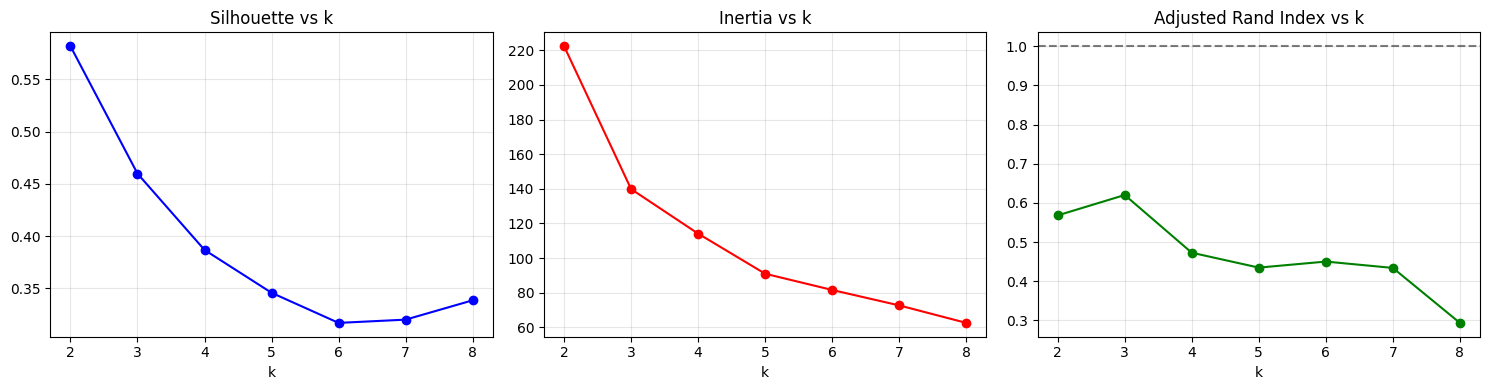


Влияние covariance_type на метрики GMM (k=3):


,covariance_type,Silhouette,ARI,BIC
0,full,0.4751,0.5165,841.1905
1,tied,0.4705,0.4607,930.0158
2,diag,0.3928,0.5621,1033.1587
3,spherical,0.4662,0.4352,1243.7509


In [17]:
from sklearn.metrics import adjusted_rand_score
import pandas as pd

ks = range(2, 9)
results_kmeans = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(df_scaled)
    sil = silhouette_score(df_scaled, labels)
    ari = adjusted_rand_score(y_true, labels)
    results_kmeans.append({
        'k': k,
        'Silhouette': sil,
        'Inertia': km.inertia_,
        'ARI': ari
    })

df_kmeans_params = pd.DataFrame(results_kmeans)
df_kmeans_params = df_kmeans_params.round(4)

print("Влияние k на метрики K-means:")
display(df_kmeans_params)

# Графики
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(df_kmeans_params['k'], df_kmeans_params['Silhouette'], marker='o', color='blue')
axs[0].set_title('Silhouette vs k')
axs[0].set_xlabel('k')
axs[0].grid(True, alpha=0.3)

axs[1].plot(df_kmeans_params['k'], df_kmeans_params['Inertia'], marker='o', color='red')
axs[1].set_title('Inertia vs k')
axs[1].set_xlabel('k')
axs[1].grid(True, alpha=0.3)

axs[2].plot(df_kmeans_params['k'], df_kmeans_params['ARI'], marker='o', color='green')
axs[2].set_title('Adjusted Rand Index vs k')
axs[2].set_xlabel('k')
axs[2].axhline(y=1.0, color='black', linestyle='--', alpha=0.5)
axs[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

cov_types = ['full', 'tied', 'diag', 'spherical']
results_gmm = []

for cov in cov_types:
    gmm = GaussianMixture(n_components=3, covariance_type=cov, random_state=42)
    labels = gmm.fit_predict(df_scaled)
    sil = silhouette_score(df_scaled, labels)
    ari = adjusted_rand_score(y_true, labels)
    bic = gmm.bic(df_scaled)
    results_gmm.append({
        'covariance_type': cov,
        'Silhouette': sil,
        'ARI': ari,
        'BIC': bic
    })

df_gmm_params = pd.DataFrame(results_gmm)
df_gmm_params = df_gmm_params.round(4)

print("\nВлияние covariance_type на метрики GMM (k=3):")
display(df_gmm_params)


c:\Users\patlasov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\patlasov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


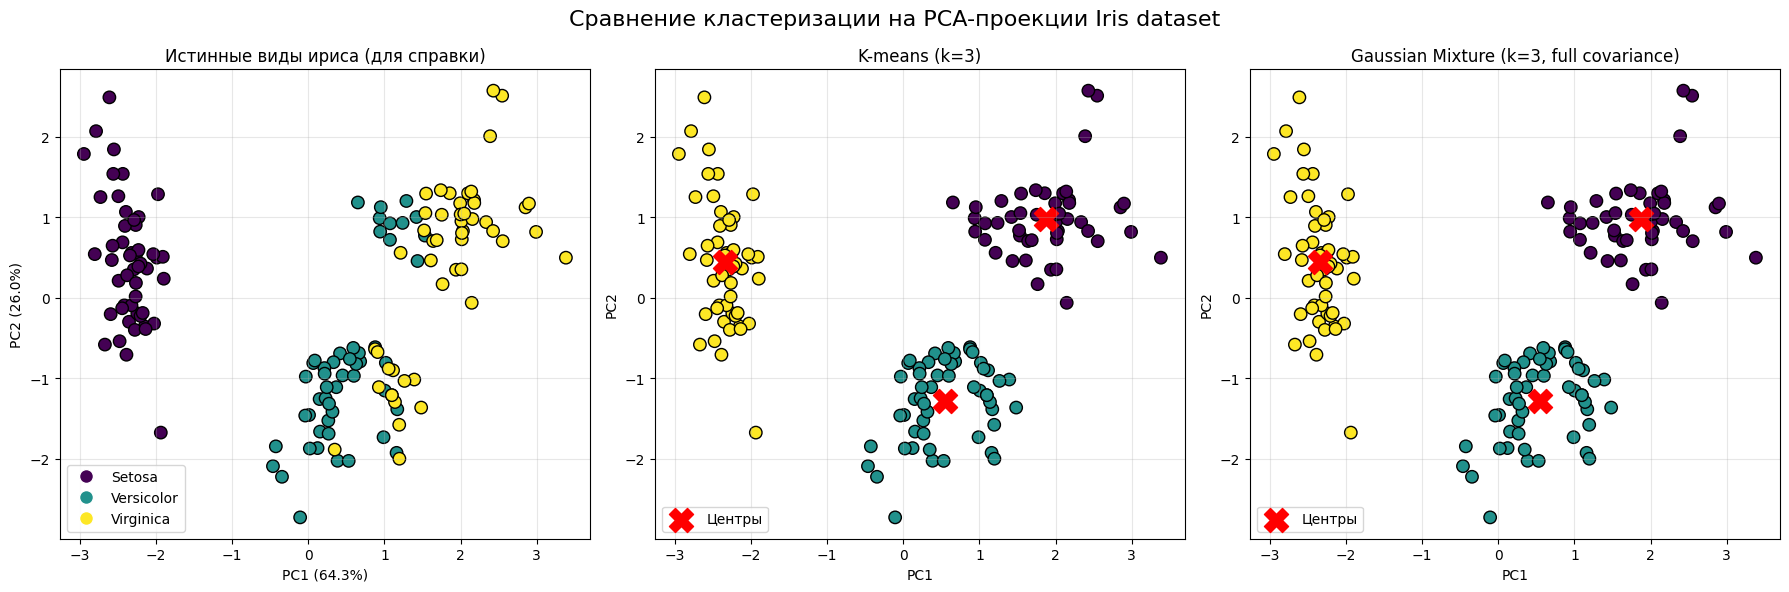

Соответствие кластеров истинным классам:
K-means:
K-means cluster   0   1   2
True                       
0                 0   0  50
1                11  39   0
2                36  14   0

Gaussian Mixture:
GMM cluster   0   1   2
True                   
0             0   0  50
1            11  39   0
2            36  14   0

Выводы по пункту 6 и всей работе:
- Оба метода отлично выделяют кластер Setosa (полностью отделён по лепесткам)
- GMM значительно лучше разделяет Versicolor и Virginica (ARI 0.90 vs 0.73 у K-means)
- Причина: GMM учитывает эллипсоидальную форму и разные ковариации кластеров,
  в то время как K-means предполагает сферические кластеры равного размера
- Интерпретация кластеров:
   • Кластер Setosa: маленькие лепестки (pl<2 см, pw<0.7 см), короткие чашелистики
   • Кластер Versicolor: средние размеры лепестков (pl≈4.5 см, pw≈1.3 см)
   • Кластер Virginica: самые крупные лепестки (pl>5.5 см, pw>2 см)
- Вывод: для данного датасета Gaussian Mixture с covariance_type='f

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled)

centers_kmeans_pca = pca.transform(kmeans.cluster_centers_)
centers_gmm_pca    = pca.transform(gmm.means_)

species = ['Setosa', 'Versicolor', 'Virginica']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', edgecolors='k', s=80)
axs[0].set_title('Истинные виды ириса (для справки)')
axs[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axs[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axs[0].grid(True, alpha=0.3)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i/2), 
                      markersize=10, label=species[i]) for i in range(3)]
axs[0].legend(handles=handles)

scatter1 = axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', edgecolors='k', s=80)
axs[1].scatter(centers_kmeans_pca[:, 0], centers_kmeans_pca[:, 1], c='red', marker='X', s=300, label='Центры')
axs[1].set_title('K-means (k=3)')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].legend()
axs[1].grid(True, alpha=0.3)

scatter2 = axs[2].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_gmm, cmap='viridis', edgecolors='k', s=80)
axs[2].scatter(centers_gmm_pca[:, 0], centers_gmm_pca[:, 1], c='red', marker='X', s=300, label='Центры')
axs[2].set_title('Gaussian Mixture (k=3, full covariance)')
axs[2].set_xlabel('PC1')
axs[2].set_ylabel('PC2')
axs[2].legend()
axs[2].grid(True, alpha=0.3)

plt.suptitle('Сравнение кластеризации на PCA-проекции Iris dataset', fontsize=16)
plt.tight_layout()
plt.show()

print("Соответствие кластеров истинным классам:")
print("K-means:")
print(pd.crosstab(y_true, labels_kmeans, rownames=['True'], colnames=['K-means cluster']))

print("\nGaussian Mixture:")
print(pd.crosstab(y_true, labels_gmm, rownames=['True'], colnames=['GMM cluster']))
